# INTRODUCTION TO PYTHON SCRIPTING FOR GEOSPATIAL

**XSAVI 810: INTRODUCTION TO PYTHON SCRIPTING FOR GEOSPATIAL**
    
## Class 3

### Review on CSV's and Python

CSV Files in Python || Python Tutorial || Learn Python Programming
Socratica 
* https://www.youtube.com/watch?v=Xi52tx6phRU

Python Basics: Reading Data From CSV File
 || Coding is for girls video series
* https://www.youtube.com/watch?v=a8V6b1iy-Hg

**Read XLS and write to CSV** - may have to `pip install xlrd`

In [94]:
import pandas as pd 
 
xlsFile = 'data/address_list.xlsx'
df = pd.io.excel.read_excel(xlsFile, 'Sheet1')

df['zip'] = df.address.str.split('NY ',1).str[1]

df.to_csv('data/address_list_split.csv')

df

,id,address,zip
0,1,"200 Willoughby Ave, Brooklyn, NY 11205",11205
1,2,"125 E 11th St, New York, NY 10003",10003
2,3,"319 Frost St, Brooklyn, NY 11222",11222


### More Python Links

##### [Talk Python to Me - Podcast](https://talkpython.fm/)

<img src="https://talkpython.fm/static/img/talk_python_logo_mic.png?cache_id=4e8e76b2438a57933fe769bd1fc5f6ef
" width="100" >

A recent Dr. Damien Irving a climate science researcher who uses Python and GIS. 

    
http://timmyreilly.azurewebsites.net/python-pip-virtualenv-installation-on-windows/
    
    
https://github.com/nygeog/foursquare/blob/master/api_calls_examples.txt
    
show read carto csv https://nygeog.cartodb.com/api/v2/sql?filename=nycb2010_treesdata_all_trees_1995_2005_2015.csv&format=csv&q=SELECT bctcb2010,count1995,count2005,count2015 FROM nycb2010_treesdata


### [Try Git](https://try.github.io)

For fun GitHub commands learning:
    
[![](https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/img/try-git.png?raw=true)](https://try.github.io)

## Things to cover today:
* Virtual Environments on Windows and pointing to your ArcGIS Python
* ArcPy Geoprocessing
* More on Dictionaries...
* Geocoding API 


# ArcPy in VIRTUAL ENV for Windows!!!


Install **[pip](https://pip.pypa.io/en/stable/installing/#do-i-need-to-install-pip)** and **[virtualenv](https://virtualenv.pypa.io/en/stable/)**. 

**pip**:

* https://pip.pypa.io/en/stable/installing/#do-i-need-to-install-pip
* https://bootstrap.pypa.io/get-pip.py


**virtualenv**:
        
    pip install virtualenv

[Change your **PATH** in your **ENVIRONMENT**](https://stackoverflow.com/questions/3701646/how-to-add-to-the-pythonpath-in-windows-7):

    C:\Python27\;C:\Python27\Scripts\

Or for **ArcGIS's Python** location:

    C:\Python27\ArcGIS10.4\;C:\Python27\ArcGIS10.4\Scripts\

<img src="https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/img/arcgis_python_location.png?raw=true" width="300" >

<img src="https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/img/windows-edit-env.png?raw=true" width="300" >

<img src="https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/img/path.png?raw=true" width="300" >

Then make sure **close terminal window and then reopen**. 


* **activate virtualenv** on a windows machine:

        virtualenv env
        del env\Lib\no-global-site-packages.txt
        env\Scripts\activate.bat
	
<img src="https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/img/env-commands.png?raw=true" width="400" >
  

### Let's try a [Buffer analysis](http://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/buffer.htm) now in arcpy:

        import arcpy
        inputFile = 'Y:/GitHub/pratt-savi-810-2017-10/data/nybb_17c/nybb.shp'
        outputFile = 'Y:/GitHub/pratt-savi-810-2017-10/data/nybb_17c/nybb_buffer.shp'
        arcpy.Buffer_analysis(inputFile, outputFile, '10000 feet')  
  
* **deactivate virtual env**:

        deactivate
	
## [Calling arcpy from an external virtual Python environment](https://my.usgs.gov/confluence/display/cdi/Calling+arcpy+from+an+external+virtual+Python+environment)


More about **no-site-packeges**:
* https://stackoverflow.com/questions/3371136/revert-the-no-site-packages-option-with-virtualenv
* https://stackoverflow.com/questions/3873294/can-i-change-an-an-existing-virtualenv-to-ignore-global-site-packages-like-n


We can also install other libraries in our virtual environment, like jupyter notebooks, etc.

        pip install jupyter 
        pip install ipython
        pip install pandas



<img src="https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/img/arcgis_python_location.png?raw=true" width="300">

<img src="https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/img/windows-edit-env.png?raw=true" width="300" >


https://pythongisandstuff.wordpress.com/2013/07/10/locating-python-adding-to-path-and-accessing-arcpy/

## Dictionaries and nested values

Let's say I have a dictionary like this:

In [62]:
d = {'Neutral Milk Hotel': 
         {'On Avery Island': 
              {'year': 1996, 'record company': 'Merge Records'},
         'In the Aeroplane Over the Sea': 
              {'year': 1998, 'record company': 'Merge Records', 'category': 'indie'},
         'Unfinished': None},
     'Big Star': 
         {'#1 Record':
              {'year': 1972, 'record company': 'Ardent/Stax', 'instrument': 'guitar'},
         'Radio City':
              {'year': 1974, 'record company': 'Ardent/Stax'},
         'Third/Sister Lovers':
              {'year': 1978, 'record company': 'PVC'},
         'In Space':
              {'year': 2005, 'record company': 'Rykodisc'}},
     'ArcPy Music Band': 
         {'Unfinished': None},
         } 

In [63]:
for i, j in d.iteritems():
    print i
    for k in j:
        print '    ', k

Neutral Milk Hotel
     In the Aeroplane Over the Sea
     On Avery Island
     Unfinished
ArcPy Music Band
     Unfinished
Big Star
     Radio City
     Third/Sister Lovers
     #1 Record
     In Space


#### Accessing value from keys:

In [64]:
d['Big Star']['In Space']

{'record company': 'Rykodisc', 'year': 2005}

In [65]:
d['Neutral Milk Hotel']['In the Aeroplane Over the Sea']['category']

'indie'

In [66]:
d['Neutral Milk Hotel']['On Avery Island']['category']

KeyError: 'category'

^ Error because that album has no `category` key and value set. 

### JSON as a response

In [81]:
import requests
r = requests.get('https://github.com/timeline.json')
print r.text

{"message":"Hello there, wayfaring stranger. If you’re reading this then you probably didn’t see our blog post a couple of years back announcing that this API would go away: http://git.io/17AROg Fear not, you should be able to get what you need from the shiny new Events API instead.","documentation_url":"https://developer.github.com/v3/activity/events/#list-public-events"}


Spotify JSON example:
https://developer.spotify.com/web-api/get-album/

Flicket JSON example:
http://www.flickr.com/services/feeds/photos_public.gne?tags=soccer&format=json

## ModelBuilder Example

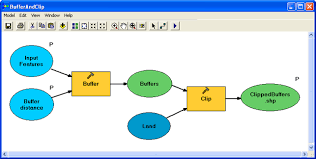